In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import ScalarFormatter
import numpy as np


In [ ]:

path = os.path.join(os.path.dirname(os.getcwd()), 'src\rfesults')

In [5]:
xbase = pd.read_excel('Xbase.xlsx', index_col = [0], header = [0])

In [6]:
sectors = list(xbase.index.unique())
regions = list(xbase.columns.unique())

##### Criticality - Rationing

In [8]:
rat_results = pd.DataFrame(index = sectors, columns = regions)

for i in range(len(regions)):
    for j in range(len(sectors)):
        r = regions[i]
        s = sectors[j]
        
        rat = pd.read_excel(os.path.join(path, f'Rat_{r}_{s}_0.1_mosek.xlsx'), index_col = [0], header = [1])
        rat = rat.drop("Index2", axis = 'index')
        rat_sum = rat.sum().sum()
        rat_results.loc[s,r] = rat_sum

In [9]:
#### Normalisation
a = rat_results.sum().sum()
rat_results = rat_results/a
rat_results.to_excel('rat_criticality.xlsx')

#### Heatmap

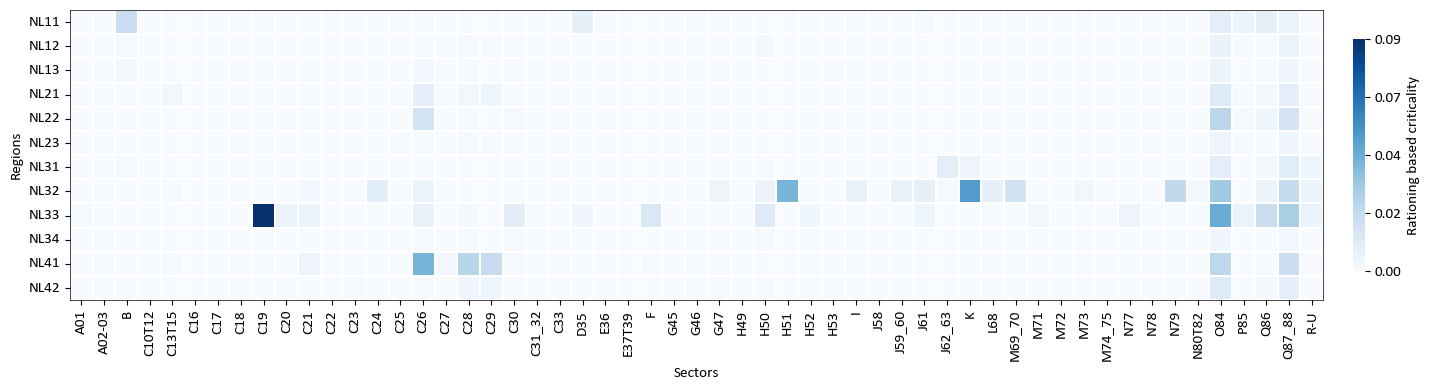

In [10]:
font = 'Calibri'
df = rat_results.T
df = df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(16, 4))  
heatmap  = sns.heatmap(df, cmap="Blues", linecolor='white', linewidths=0.01 , cbar=True, cbar_kws={'shrink': 0.8, 'pad': 0.02})
plt.xticks(rotation=90, ha='center' , fontsize = 11, fontname = font)
plt.yticks(fontsize = 11, fontname = font)

plt.xlabel("Sectors", fontsize = 11, fontname = font)
plt.ylabel("Regions", fontsize = 11, fontname = font)

ax = plt.gca()
for _, spine in ax.spines.items():
    spine.set_visible(True)   
    spine.set_color('black')  
    spine.set_linewidth(0.5)  


    
font_prop = FontProperties(family= font, size=11)
cbar = heatmap.collections[0].colorbar  

# Get minimum and maximum values from the colorbar
vmin, vmax = cbar.vmin, cbar.vmax

# Get minimum and maximum values from the colorbar
vmin, vmax = cbar.vmin, cbar.vmax

# Define four ticks: min, 25th percentile, 75th percentile, and max
ticks = [vmin, vmin + (vmax - vmin) * 0.25, vmin + (vmax - vmin) * 0.5, vmin + (vmax - vmin) * 0.75, vmax]
tick_labels = [f"{v:.2f}" for v in ticks]  # Optional: Format tick labels with 2 decimals

# Set colorbar ticks and labels
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)


cbar.set_label("Rationing based criticality", fontsize=11, fontproperties=font_prop) 
cbar.ax.tick_params(labelsize=11) 
for label in cbar.ax.get_yticklabels():  
    label.set_fontproperties(font_prop)

plt.savefig('criticality_heatmap_ration.jpeg', dpi = 1200, bbox_inches = 'tight')
plt.tight_layout()
plt.show()
